# Phase 1 Project

# Introduction

In today's dynamic film industry, staying abreast of emerging trends is paramount for any studio looking to make a mark. As requested by stakeholders, this report looks into an analysis of recent film trends to provide valuable insights for the launch of the new studio. By examining the types of films that have been performing well, we aim to equip stakeholders with actionable information to guide strategic decision-making

## Overview

The primary objective of this report is to identify and analyze recent trends in the film industry, particularly focusing on the types of films that have garnered success. Through data-driven analysis, we aim to provide stakeholders with a comprehensive understanding of audience preferences and market dynamics, thereby informing the strategic direction for the launch of a new studio.


# 1.1 Explore the tmdb movies dataset with Pandas

## 1.0 Data Understanding

Each record (row) in this dataset represents movies that were aired on box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**original_title**: `The title of the movies`

**popularity**: `The percentage of how the movies are popular among box office users`

**Vote_average**: ` average rating given to a movie by viewers from a scale of 0 to 10`

**vote_count**: `The number of individual votes or ratings that a movie has received from viewers.Total number of people who have rated the movie`

In [24]:
import pandas as pd
import numpy as np
from numbers import Number
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [25]:
df = pd.read_csv ('data/tmdb.movies.csv', index_col=0)
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## 1.2 Data Cleaning

### Identify the duplicate data in the dataframe and remove the duplicate rows in order to achieve the right data to be used for analysis.

In [26]:
# we have to dropped the duplicate rows
df = df.drop_duplicates()
df 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


## 1.3 Descriptive Statistics

In [28]:
df.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


## 1.4 Explore Correlations

To understand more about what features of these movies that lead to them getting more popular, let's look at some correlations.

We'll only check the correlations with some kind of numeric data type.
 Explore Correlations

To understand more about what features of these movies that lead to them getting more popular, let's look at some correlations.

We'll only check the correlations with some kind of numeric data type.


In [29]:
#import additional libraries
from scipy.stats import pearsonr


In [37]:
#Calculate the correlation matrix for the specified columns
correlation_matrix = df[['popularity', 'vote_average', 'vote_count']].corr()

# Display the correlation matrix
print(correlation_matrix)

              popularity  vote_average  vote_count
popularity      1.000000      0.057178    0.685285
vote_average    0.057178      1.000000    0.079160
vote_count      0.685285      0.079160    1.000000


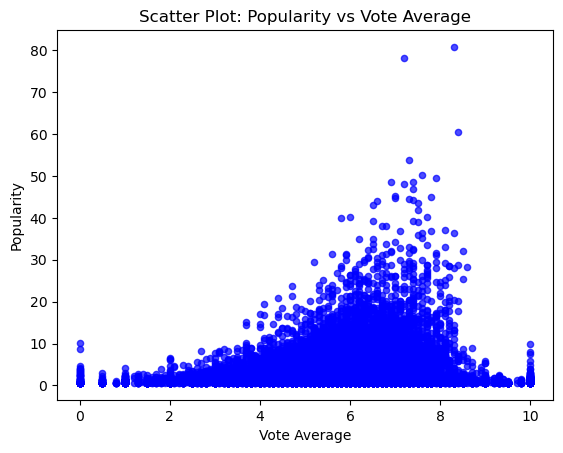

In [40]:
# Create scatter plot
df.plot.scatter(x='vote_average', y='popularity', color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Popularity vs Vote Average')

# Show plot
plt.show()

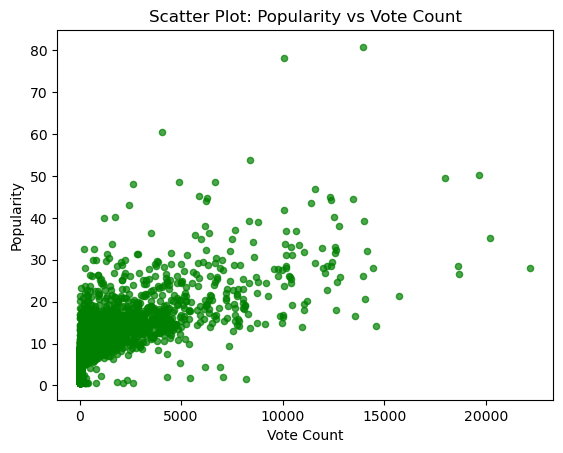

In [42]:
# Create scatter plot
df.plot.scatter(x='vote_count', y='popularity', color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Popularity vs Vote Count')

# Show plot
plt.show()

#### Interprate the Correlations

As shown above we can note that the correlation between the diffrent variables:

- The correlation coefficient between popularity and vote_average is 0.057. Since it is close to zero this suggests a very weak positive relationship between these two variables. Since the correlation is weak, it suggests that there isn't a strong tendency for movies with higher popularity ratings to have higher vote_average ratings, or vice versa.

- The correlation coefficient between popularity and vote_count is 0.69. Its is relatively high, indicating a noticeable positive linear relationship  between these two variables.Since the correlation is moderately strong, it suggests that there is a tendency for movies with higher popularity ratings to have higher vote_counts, and vice versa. In other words, movies that are more popular tend to have received more votes.

- The correlation coefficient  between vote average and vote_count is 0.079.Suggests a very weak positive relationship,indicating that there is little to no linear relationship between these two variables.Shows there isn't a strong tendency for movies with higher vote counts to have higher average ratings, or vice versa.


## 1.5 List Top 10 Popular Movies 
List of `top_10_popular_movies` containing the names of the 10 movies with the most popularity and the year they were released (using the `'popularity'` and `'release_date	'` column).

This will help us to establish how the top popular movies will impact the decision of setting up the new studio.

In [43]:
# df is a DataFrame containing movie data

# Sorting the DataFrame by popularity in descending order
sorted_movies = df.sort_values(by='popularity', ascending=False)

# Selecting the top 10 popular movies
top_10_popular_movies = sorted_movies.head(10)

# Extracting the names and release years of the top 10 popular movies
top_10_movie_names = top_10_popular_movies['title'].tolist()
top_10_release_years = top_10_popular_movies['release_date'].tolist()

# Create a list containing names and release years of the top 10 popular movies
top_10_popular_movies_with_years = [(name, year) for name, year in zip(top_10_movie_names, top_10_release_years)]

# Print the list of top 10 popular movies with their release years
for movie, year in top_10_popular_movies_with_years:
    print(f"{movie} ({year})")


Avengers: Infinity War (2018-04-27)
John Wick (2014-10-24)
Spider-Man: Into the Spider-Verse (2018-12-14)
The Hobbit: The Battle of the Five Armies (2014-12-17)
The Avengers (2012-05-04)
Guardians of the Galaxy (2014-08-01)
Blade Runner 2049 (2017-10-06)
Fantastic Beasts: The Crimes of Grindelwald (2018-11-16)
Ralph Breaks the Internet (2018-11-21)
Spider-Man: Homecoming (2017-07-07)


# 2. Explore the tn.movie_budgets dataset with Pandas

## 2.1 Data Understanding

Each record (row) in this dataset represents movies that did well in box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**movie**: `The title of the movies`

**production_budget**: `The cost of producing the particular movie`

**domestic_gross**: `The total gross revenue made from the movie out of the domestic market/home country of production`

**worldwide_gross**: `The total gross revenue made from the movie out of the international market/other country in the world`


In [67]:
# Read the CSV file into a DataFrame
df = pd.read_csv ('data/tn.movie_budgets.csv', index_col=0)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [68]:
#Checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## 2.2  Convering Columns with data type as object to float

 This are rows that are not numerical in nature,we conver them to float so that they can be easy to be anayzed.

In [69]:
# Columns to convert to float
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Remove non-numeric characters and convert specified columns to float
for column in columns_to_convert:
    # Remove non-numeric characters (like commas, dollar signs, etc.)
    df[column] = df[column].str.replace('[^\d.]', '', regex=True)
    try:
        # Convert to float
        df[column] = df[column].astype(float)
    except ValueError:
        print(f"Error converting values in column '{column}' to float. Check for non-numeric values.")

# Print data types after conversion
print(df.dtypes)

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [70]:
#Drop duplicate rows
df = df.drop_duplicates()
df 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


## 2.3 Descriptive Statistics of the Data.


In [71]:
df.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


## 2.4 Profitable Movies

In order to determine the profitability of the movies produced.We get to look at the net profit of the movies both Domestic and Worldwide and determine which movies made the most income.

In [73]:
#Calculate net profit for each movie
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']

# Sort DataFrame by net profit in descending order to identify the most profitable movies
most_profitable_movies = df.sort_values(by='total_gross', ascending=False)

# Display the top 10 most profitable movies
print(most_profitable_movies[['movie', 'production_budget', 'release_date', 'total_gross']].head(10))

                                   movie  production_budget  release_date  \
id                                                                          
1                                 Avatar        425000000.0  Dec 18, 2009   
6   Star Wars Ep. VII: The Force Awakens        306000000.0  Dec 18, 2015   
43                               Titanic        200000000.0  Dec 19, 1997   
7                 Avengers: Infinity War        300000000.0  Apr 27, 2018   
34                        Jurassic World        215000000.0  Jun 12, 2015   
27                          The Avengers        225000000.0   May 4, 2012   
42                         Black Panther        200000000.0  Feb 16, 2018   
5      Star Wars Ep. VIII: The Last Jedi        317000000.0  Dec 15, 2017   
67                             Furious 7        190000000.0   Apr 3, 2015   
4                Avengers: Age of Ultron        330600000.0   May 1, 2015   

     total_gross  
id                
1   3.536853e+09  
6   2.989973e+09  

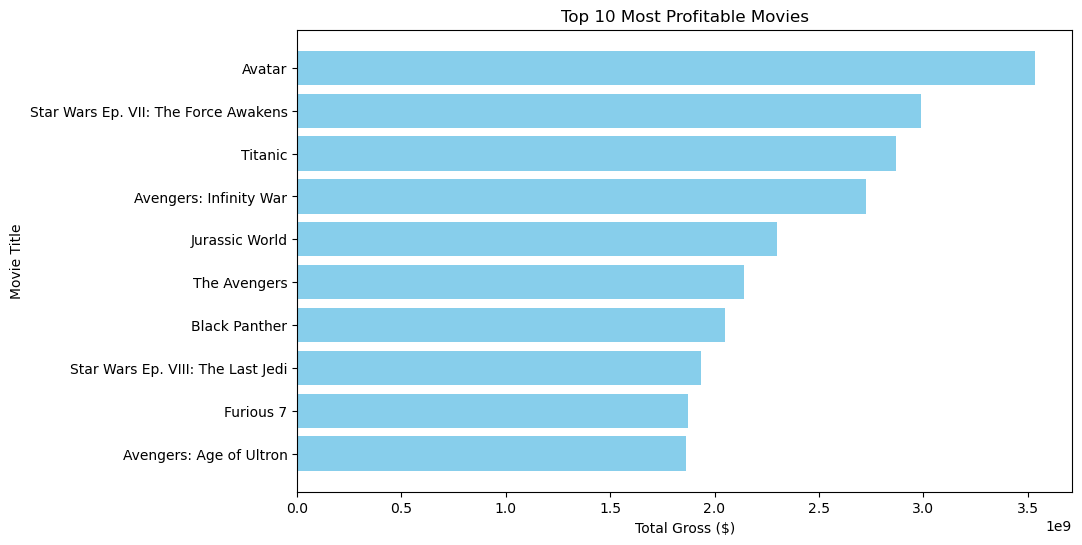

In [81]:
# Display the top 10 most profitable movies in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(most_profitable_movies['movie'].head(10), most_profitable_movies['total_gross'].head(10), color='skyblue')
plt.xlabel('Total Gross ($)')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Profitable Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest grossing movie at the top
plt.show()

In [79]:
# Calculating the total gross for each movie
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']

# Calculating the net profit for each movie
df['net_profit'] = df['total_gross'] - df['production_budget']

# Calculating the Return on investment(ROI) for each movie
df['ROI'] = (df['net_profit'] / df['production_budget']) * 100

# Sorti ng the DataFrame by ROI in descending order and select the top 10 rows
top_10_roi_movies = df.sort_values(by='ROI', ascending=False).head(10)

# Display the top 10 movies with the highest ROI
print(top_10_roi_movies[['movie', 'production_budget', 'total_gross', 'net_profit', 'ROI']])

                          movie  production_budget  total_gross   net_profit  \
id                                                                             
46                  Deep Throat            25000.0   90000000.0   89975000.0   
93          Paranormal Activity           450000.0  302101844.0  301651844.0   
7       The Blair Witch Project           600000.0  388839099.0  388239099.0   
80                  The Gallows           100000.0   64420884.0   64320884.0   
74                  El Mariachi             7000.0    4082848.0    4075848.0   
14                      Mad Max           200000.0  108500000.0  108300000.0   
10                Super Size Me            65000.0   33763176.0   33698176.0   
47                        Bambi           858000.0  370797000.0  369939000.0   
16        The Brothers McMullen            50000.0   20853012.0   20803012.0   
66  The Texas Chainsaw Massacre           140000.0   53144878.0   53004878.0   

              ROI  
id                 

Correlation between production_budget and domestic_gross: 0.6856818396752724


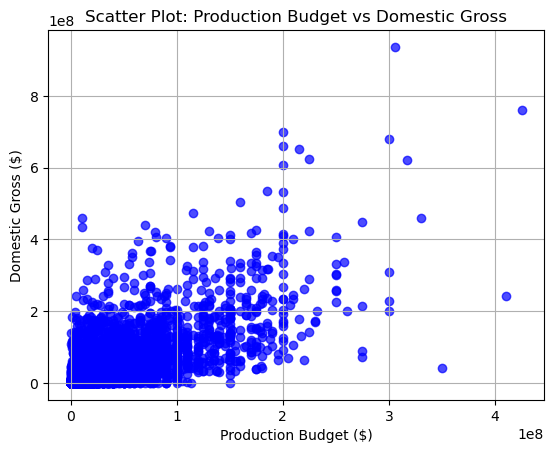

In [49]:
# Calculate the correlation between 'production_budget' and 'domestic_gross'
correlation = df['production_budget'].corr(df['domestic_gross'])
print("Correlation between production_budget and domestic_gross:", correlation)

# Create a scatter plot
plt.scatter(df['production_budget'], df['domestic_gross'], color='blue', alpha=0.7)
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.title('Scatter Plot: Production Budget vs Domestic Gross')
plt.grid(True)
plt.show()

Correlation between production_budget and worldwide_gross: 0.7483059765694747


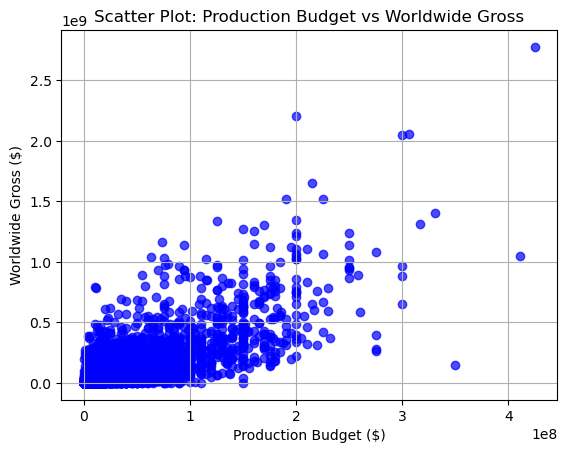

In [50]:
# Calculate the correlation between 'production_budget' and 'worldwide_gross'
correlation = df['production_budget'].corr(df['worldwide_gross'])
print("Correlation between production_budget and worldwide_gross:", correlation)

# Create a scatter plot
plt.scatter(df['production_budget'], df['worldwide_gross'], color='blue', alpha=0.7)
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.title('Scatter Plot: Production Budget vs Worldwide Gross')
plt.grid(True)
plt.show()

# 3. Explore the bom.movies_gross dataset with Pandas

### Data Understanding

Each record (row) in this dataset represents movies that did well in box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**title**: `The title of the movies`

**studio**: `The name of the studio that produced the movie`

**domestic_gross**: `The total gross revenue made from the movie out of the domestic market/home country of production`

**foreign_gross**: `The total gross revenue made from the movie out of the foreign market`
`
**Year**: `The year the movie was produced`


In [53]:
# Read the CSV file into a DataFrame
df = pd.read_csv ('data/bom.movie_gross.csv', index_col=0)
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [54]:
#Drop duplicate rows
df = df.drop_duplicates()
df 

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3376 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3371 non-null   object 
 1   domestic_gross  3348 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3376 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.9+ KB


In [56]:
#Changing the data type in values in column foreign gross to a float
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype(float)
print(df['foreign_gross'].dtype)

float64


C:\Users\Betty.Koila\AppData\Local\Temp\ipykernel_26104\1183958433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype(float)


In [57]:
df.isna()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,False,False,False,False
Alice in Wonderland (2010),False,False,False,False
Harry Potter and the Deathly Hallows Part 1,False,False,False,False
Inception,False,False,False,False
Shrek Forever After,False,False,False,False
...,...,...,...,...
The Quake,False,False,True,False
Edward II (2018 re-release),False,False,True,False
El Pacto,False,False,True,False


In [58]:
df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1339
year                 0
dtype: int64

In [59]:
# Remove rows with any NaN values
cleaned_df = df.dropna(axis=0, how='any')

# Remove columns with any NaN values
cleaned_df = df.dropna(axis=1, how='any')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean for each numeric column
column_means = df[numeric_columns].mean()

# Fill NaN values with the mean of each column
cleaned_df = df.fillna(column_means)

cleaned_df



,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,6.520000e+08,2010
Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
Inception,WB,292600000.0,5.357000e+08,2010
Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...
The Quake,Magn.,6200.0,7.487281e+07,2018
Edward II (2018 re-release),FM,4800.0,7.487281e+07,2018
El Pacto,Sony,2500.0,7.487281e+07,2018


## Top 10 most profitable movies.

#### Display the top 10 most profitable movies and the years they were produced and the respective studios that produced the movies.
We first calculate the total gross for each movie by adding the domestic and foreign gross.
Then, we sort the DataFrame based on total gross in descending order to identify the most profitable movies.
Optionally, we select the columns 'title', 'total_gross', 'year', and 'studio' to display the top 10 most profitable movies along with their shooting dates and studios.

In [64]:

# Calculate the total gross for each movie
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

# Sort DataFrame by total gross in descending order to identify the most profitable movies
most_profitable_movies = df.sort_values(by='total_gross', ascending=False)

# Optionally, display the dates and studios where the most profitable movies were shot
most_profitable_movies_with_details = most_profitable_movies[['studio', 'total_gross', 'year']]

# Display the top 10 most profitable movies along with their shooting dates and studios
print(most_profitable_movies_with_details.head(10))


                                            studio   total_gross  year
title                                                                 
Marvel's The Avengers                           BV  1.518900e+09  2012
Avengers: Age of Ultron                         BV  1.405400e+09  2015
Black Panther                                   BV  1.347000e+09  2018
Harry Potter and the Deathly Hallows Part 2     WB  1.341500e+09  2011
Star Wars: The Last Jedi                        BV  1.332600e+09  2017
Jurassic World: Fallen Kingdom                Uni.  1.309500e+09  2018
Frozen                                          BV  1.276400e+09  2013
Beauty and the Beast (2017)                     BV  1.263500e+09  2017
Incredibles 2                                   BV  1.242800e+09  2018
Iron Man 3                                      BV  1.214800e+09  2013


C:\Users\Betty.Koila\AppData\Local\Temp\ipykernel_26104\1973933906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
